Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [15]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [16]:

IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/Lung Cancer Detection/chest_xray/test'
valid_path = '/content/drive/MyDrive/Colab Notebooks/Lung Cancer Detection/chest_xray/test'


In [17]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [18]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [19]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Colab Notebooks/Lung Cancer Detection/chest_xray/train/*')

In [20]:
# our layers 
x = Flatten()(vgg.output)

In [21]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

In [22]:

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [23]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [24]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [25]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Lung Cancer Detection/chest_xray/test',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [26]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/Lung Cancer Detection/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [27]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
20/20 [==============================] - 642s 32s/step - loss: 0.7240 - accuracy: 0.7078 - val_loss: 0.2890 - val_accuracy: 0.8750
Epoch 2/5
20/20 [==============================] - 631s 32s/step - loss: 0.2397 - accuracy: 0.9013 - val_loss: 0.1809 - val_accuracy: 0.9359
Epoch 3/5
20/20 [==============================] - 631s 32s/step - loss: 0.1920 - accuracy: 0.9273 - val_loss: 0.4015 - val_accuracy: 0.8157
Epoch 4/5
20/20 [==============================] - 632s 32s/step - loss: 0.2092 - accuracy: 0.9176 - val_loss: 0.1728 - val_accuracy: 0.9295
Epoch 5/5
20/20 [==============================] - 634s 32s/step - loss: 0.1658 - accuracy: 0.9401 - val_loss: 0.1617 - val_accuracy: 0.9359


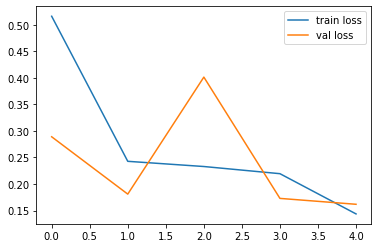

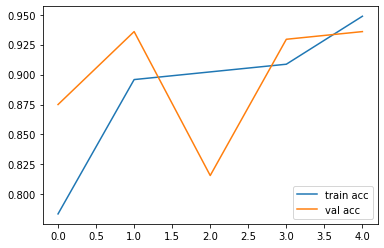

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [32]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [33]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3





In [35]:
from keras.models import load_model 
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
import numpy as np
model= load_model('model_vgg16.h5')
img= image.load_img('/content/drive/MyDrive/Colab Notebooks/Lung Cancer Detection/chest_xray/test/PNEUMONIA/person101_bacteria_483.jpeg',target_size=(224,224))
x= image.img_to_array(img)
x= np.expand_dims(x,axis=0)
img_data= preprocess_input(x)
classes= model.predict(img_data)


In [37]:
print(classes)

[[2.4609014e-23 1.0000000e+00]]
